In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/sample_data/clean_data_hotels.csv");
df

,Title,Rating,Expert Rating,Location,Price Per Night,Distance From City (in km),Facilities,Country
0,Roda Al Murooj Hotel Dubai,5 Star Hotel,9.7,Dubai,20000,3,"Free Wi-Fi, Free Parking, Outdoor Pool, Air-Co...",Dubai
1,Taj Hotel Dubai,5 Star Hotel,9.5,Dubai,10000,14,"Outdoor Pool, Laundry Service, Room Service",Dubai
2,Holiday Inn Downtown Dubai,4 Star Hotel,9.5,Dubai,5000,6,"Free Parking, Free Wi-Fi, Fitness Center",Dubai
3,The Oberoi Hotel Dubai,5 Star Hotel,9.5,Dubai,5000,5,"Free Parking, Laundry Service, Room Service, R...",Dubai
4,The Ritz Carlton Hotel Dubai,5 Star Hotel,9.5,Dubai,20000,3,"Fitness Center, Free Wi-Fi",Dubai
...,...,...,...,...,...,...,...,...
1990,Yotel Hotel Singapore,4 Star Hotel,7.0,Singapore,12000,4,"Free Wi-Fi, Free Parking, Outdoor Pool, Air-Co...",Singapore
1991,Diamond Hotel,2 Star Hotel,6.9,Singapore,4000,3,"Free Parking, Laundry Service, Air-Conditioned",Singapore
1992,Fragrance Hotel Rose,2 Star Hotel,6.9,Singapore,4000,3,"Air-Conditioned, Laundry Service",Singapore
1993,The Darlene Hotel,1 Star Hotel,6.9,Singapore,4000,3,"Free Parking, Air-Conditioned, Laundry Service",Singapore


In [ ]:
df.shape

(1995, 8)

**removing outliers**

<Axes: >

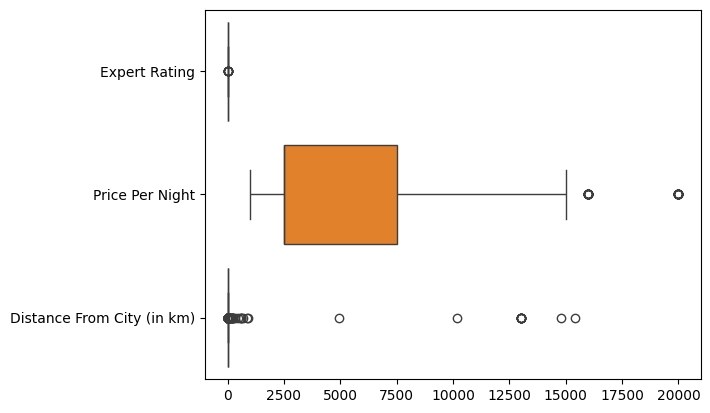

In [ ]:
sns.boxplot(df,orient='h')

**1. Expert Rating**:
Has a very small spread (box is not visible), indicating low variance — most ratings are clustered close together.

There are a few outliers on the higher side (shown as dots), indicating some unusually high expert ratings.

**2. Price Per Night (orange box)**:
Shows a wide IQR, suggesting high variability in pricing.

The median price lies somewhere between ₹3000 and ₹4000 (exact value not labeled but inferred from position).

There are multiple outliers on the higher end — this could indicate some luxury or premium hotels charging much more than others.

The lower whisker is much shorter than the upper one, suggesting some skew toward higher prices.

**3. Distance From City (in km)**:
Most properties are very close to the city (box is squeezed toward the left).

There are many outliers far from the city, going even up to 15,000+ km, which is likely due to either data errors or international properties being considered.

The clustering near 0 suggests most properties are city-based or nearby.

In [3]:
df['Facilities List'] = df['Facilities'].apply(lambda x: [i.strip() for i in x.split(',')])

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Step 4: Create binary columns (1/0) for each facility
facilities_df = pd.DataFrame(mlb.fit_transform(df['Facilities List']), columns=mlb.classes_, index=df.index)

# Step 5: Keep 1/0 as-is
df = pd.concat([df.drop(columns=['Facilities', 'Facilities List']), facilities_df], axis=1)


**observation**:
becoz the facility col had so many fields which made ploting graph dificult so we had to find unique among facility and make separate table for it

In [ ]:
df

,Title,Rating,Expert Rating,Location,Price Per Night,Distance From City (in km),Country,Air-Conditioned,Fitness Center,Free Parking,Free Wi-Fi,Laundry Service,Outdoor Pool,Restaurant,Room Service
0,Roda Al Murooj Hotel Dubai,5 Star Hotel,9.7,Dubai,20000,3,Dubai,1,0,1,1,0,1,0,0
1,Taj Hotel Dubai,5 Star Hotel,9.5,Dubai,10000,14,Dubai,0,0,0,0,1,1,0,1
2,Holiday Inn Downtown Dubai,4 Star Hotel,9.5,Dubai,5000,6,Dubai,0,1,1,1,0,0,0,0
3,The Oberoi Hotel Dubai,5 Star Hotel,9.5,Dubai,5000,5,Dubai,0,0,1,0,1,0,1,1
4,The Ritz Carlton Hotel Dubai,5 Star Hotel,9.5,Dubai,20000,3,Dubai,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,Yotel Hotel Singapore,4 Star Hotel,7.0,Singapore,12000,4,Singapore,1,0,1,1,0,1,0,0
1991,Diamond Hotel,2 Star Hotel,6.9,Singapore,4000,3,Singapore,1,0,1,0,1,0,0,0
1992,Fragrance Hotel Rose,2 Star Hotel,6.9,Singapore,4000,3,Singapore,1,0,0,0,1,0,0,0
1993,The Darlene Hotel,1 Star Hotel,6.9,Singapore,4000,3,Singapore,1,0,1,0,1,0,0,0


In [4]:
df['Distance From City (in km)']=df['Distance From City (in km)'].astype('float64')

In [5]:
df.loc[df['Distance From City (in km)'] > 1000, 'Distance From City (in km)'] /= 1000

**observation**:
1. some of the values in dist from city column where is 1000 to 10000 km which was a mistake as the values where in meter.
2.we need to convert the m value to km

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       1995 non-null   object 
 1   Rating                      1995 non-null   object 
 2   Expert Rating               1995 non-null   float64
 3   Location                    1995 non-null   object 
 4   Price Per Night             1995 non-null   int64  
 5   Distance From City (in km)  1995 non-null   float64
 6   Country                     1995 non-null   object 
 7   Air-Conditioned             1995 non-null   int64  
 8   Fitness Center              1995 non-null   int64  
 9   Free Parking                1995 non-null   int64  
 10  Free Wi-Fi                  1995 non-null   int64  
 11  Laundry Service             1995 non-null   int64  
 12  Outdoor Pool                1995 non-null   int64  
 13  Restaurant                  1995 

**observation**:<br>
outliers were present in distance from city table where distance was in km and some were in meter i have converted the m value inform of km

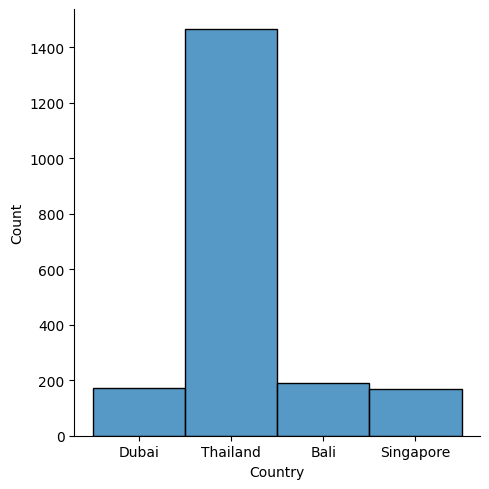

In [ ]:
sns.displot(df['Country'])

<Axes: xlabel='Country', ylabel='Expert Rating'>

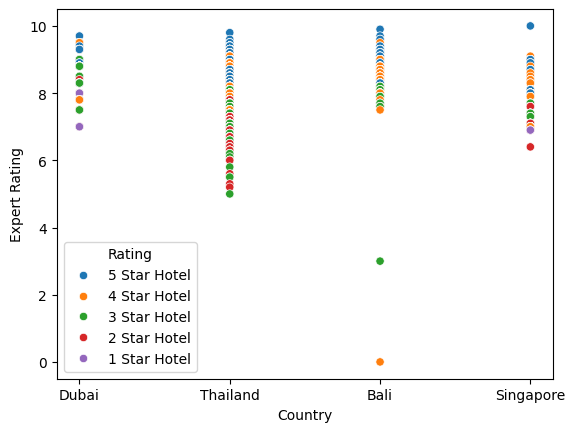

In [ ]:
sns.scatterplot(y='Expert Rating',x='Country',data=df,hue='Rating')

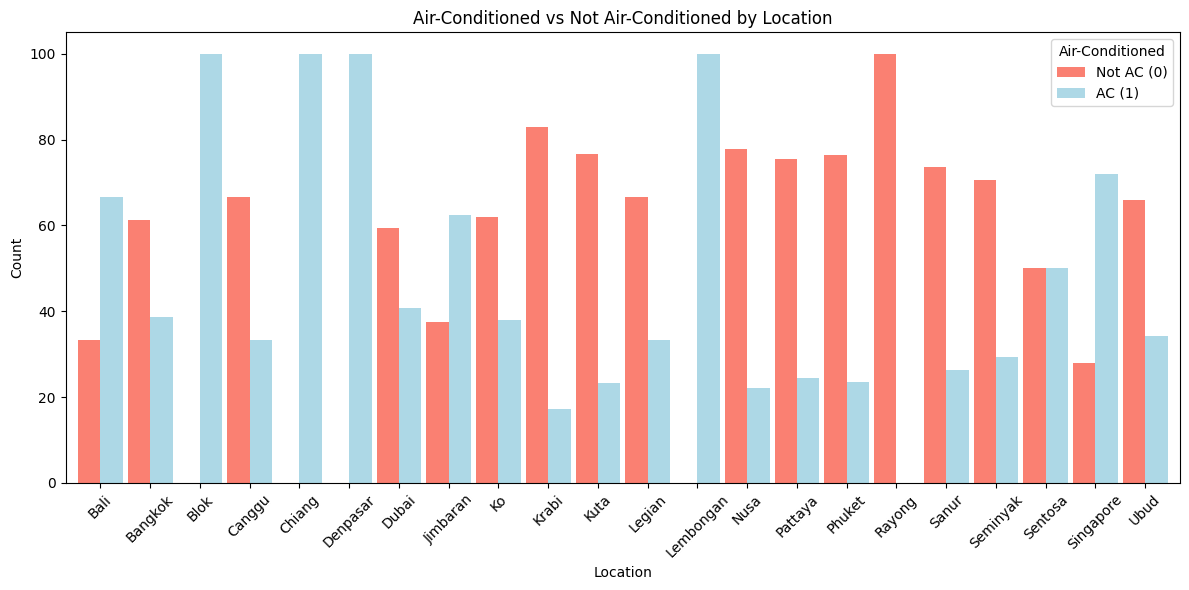

In [ ]:
ac_counts = df.groupby('Location')['Air-Conditioned'].value_counts(normalize=True).unstack(fill_value=0)*100

# Plot grouped bar chart
ac_counts.plot(kind='bar', figsize=(12, 6), color=['salmon', 'lightblue'], width=0.9)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Air-Conditioned vs Not Air-Conditioned by Location')
plt.xticks(rotation=45)
plt.legend(title='Air-Conditioned', labels=['Not AC (0)', 'AC (1)'])
plt.tight_layout()
plt.show()

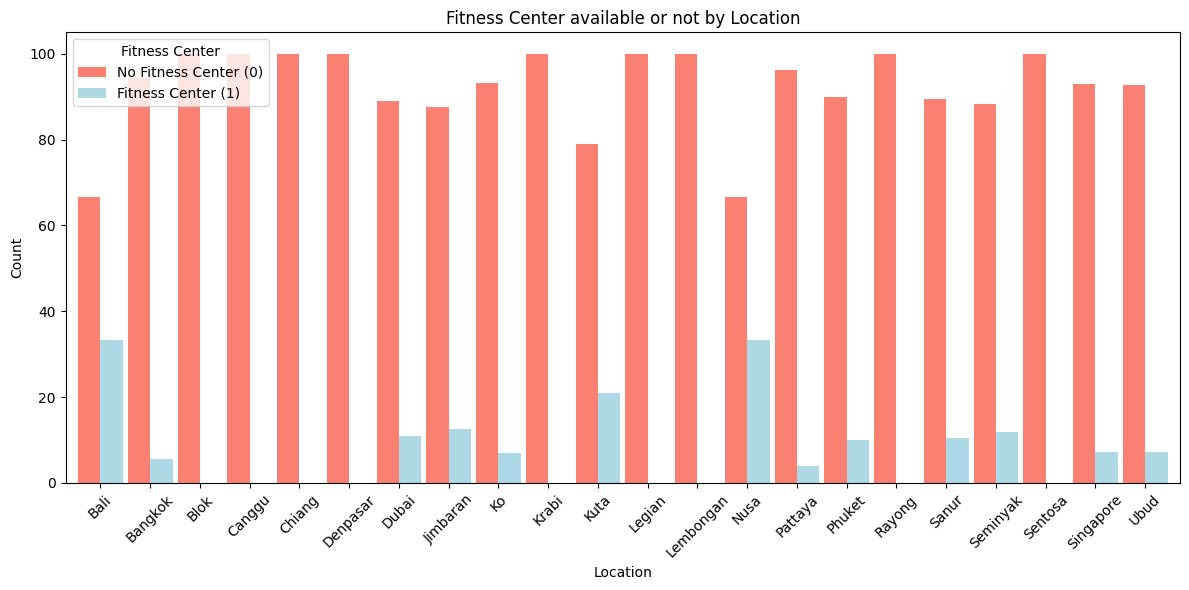

In [ ]:
fc_counts = df.groupby('Location')['Fitness Center'].value_counts(normalize=True).unstack(fill_value=0)*100
# Plot grouped bar chart
fc_counts.plot(kind='bar', figsize=(12, 6), color=['salmon', 'lightblue'],width=0.9)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Fitness Center available or not by Location')
plt.xticks(rotation=45)
plt.legend(title='Fitness Center', labels=['No Fitness Center (0)', 'Fitness Center (1)'])
plt.tight_layout()
plt.show()

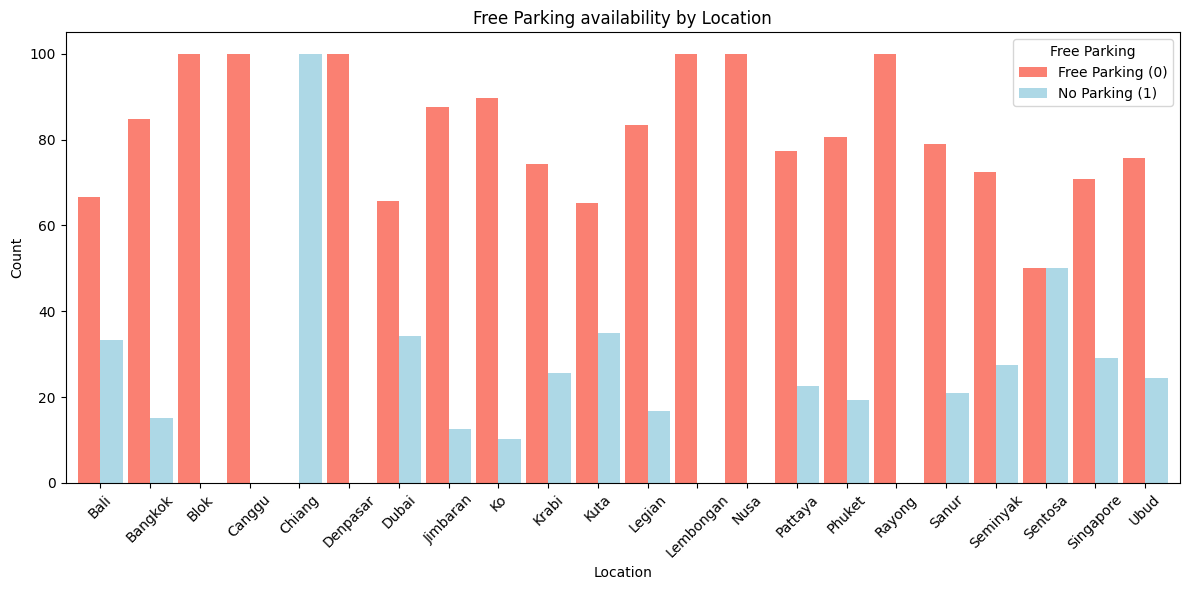

In [ ]:
fp_counts = df.groupby('Location')['Free Parking'].value_counts(normalize=True).unstack(fill_value=0)*100
# Plot grouped bar chart
fp_counts.plot(kind='bar', figsize=(12, 6), color=['salmon', 'lightblue'],width=0.9)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Free Parking availability by Location')
plt.xticks(rotation=45)
plt.legend(title='Free Parking', labels=['Free Parking (0)', 'No Parking (1)'])
plt.tight_layout()
plt.show()

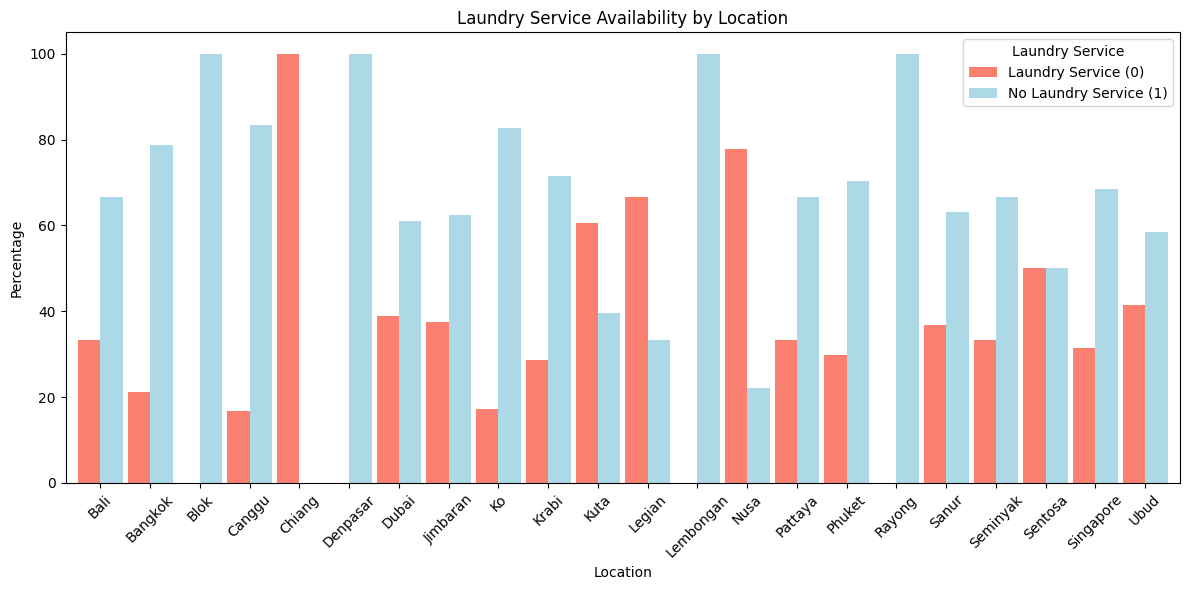

In [ ]:
ls_counts = df.groupby('Location')['Laundry Service'].value_counts(normalize=True).unstack(fill_value=0)*100
# Plot grouped bar chart
ls_counts.plot(kind='bar', figsize=(12, 6), color=['salmon', 'lightblue'],width=0.9)
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.title('Laundry Service Availability by Location')
plt.xticks(rotation=45)
plt.legend(title='Laundry Service', labels=['Laundry Service (0)', 'No Laundry Service (1)'])
plt.tight_layout()
plt.show()

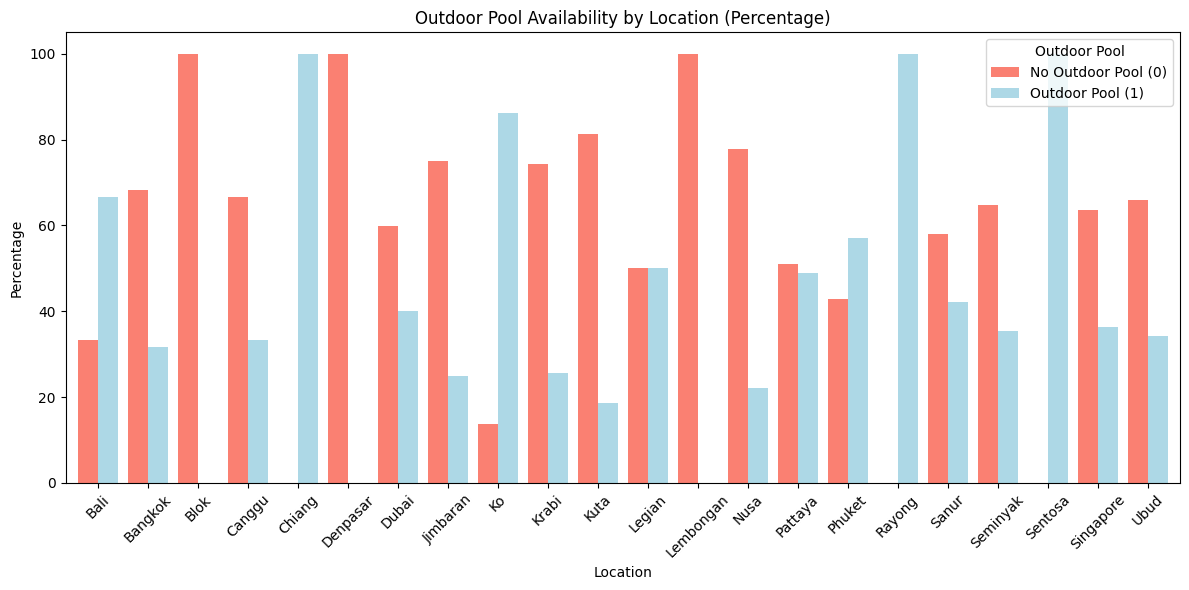

In [ ]:
op_counts = df.groupby('Location')['Outdoor Pool'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Normalize to percentage

# Plot the grouped bar chart with percentages
op_counts.plot(kind='bar', figsize=(12, 6), color=['salmon', 'lightblue'], width=0.8)

plt.xlabel('Location')
plt.ylabel('Percentage')
plt.title('Outdoor Pool Availability by Location (Percentage)')
plt.xticks(rotation=45)
plt.legend(title='Outdoor Pool', labels=['No Outdoor Pool (0)', 'Outdoor Pool (1)'])
plt.tight_layout()

# Show the plot
plt.show()

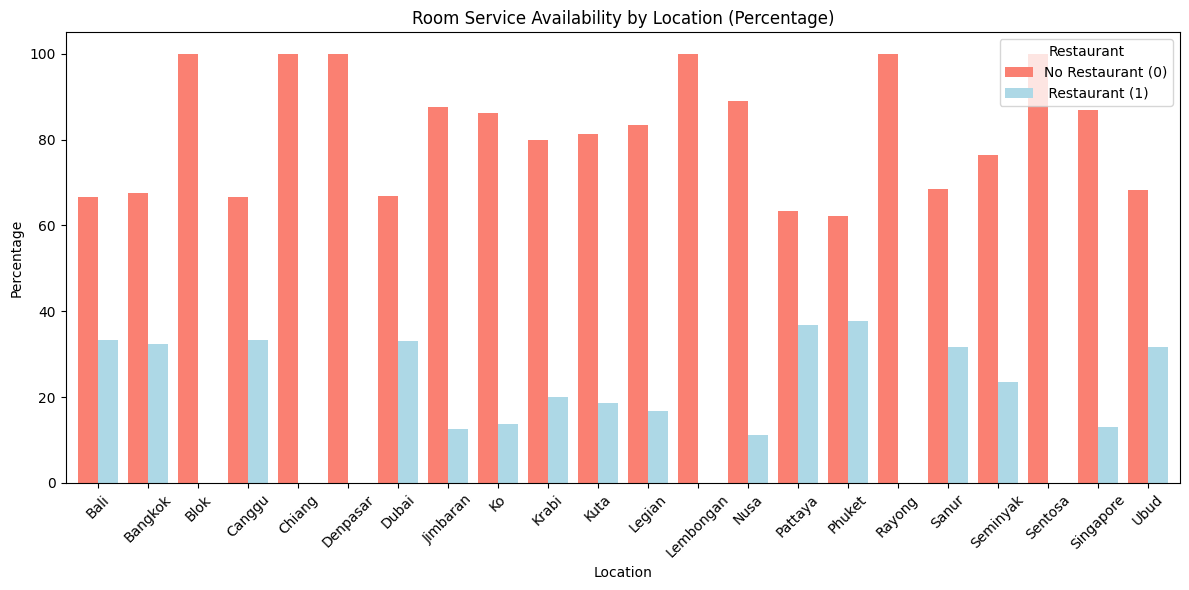

In [ ]:
ac_counts = df.groupby('Location')['Restaurant'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Normalize to percentage

# Plot the grouped bar chart with percentages
ac_counts.plot(kind='bar', figsize=(12, 6), color=['salmon', 'lightblue'], width=0.8)

plt.xlabel('Location')
plt.ylabel('Percentage')
plt.title('Room Service Availability by Location (Percentage)')
plt.xticks(rotation=45)
plt.legend(title='Restaurant', labels=['No Restaurant (0)', ' Restaurant (1)'])
plt.tight_layout()

# Show the plot
plt.show()

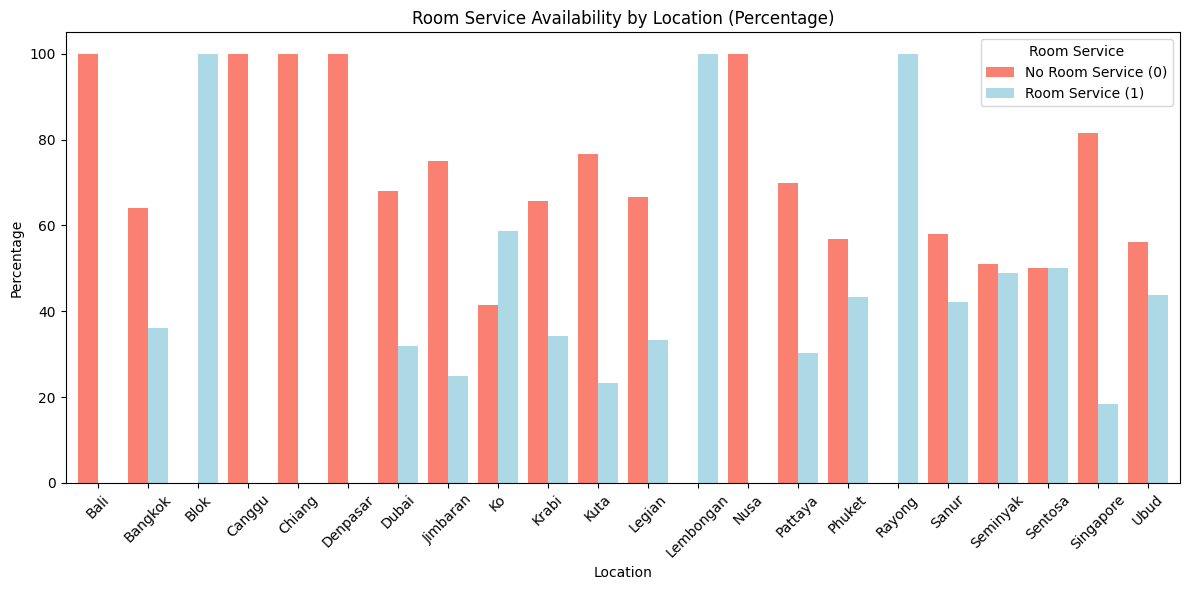

In [ ]:
# Group by Location and Room Service, then get value counts
rs_counts = df.groupby('Location')['Room Service'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Normalize to percentage

# Plot the grouped bar chart with percentages
rs_counts.plot(kind='bar', figsize=(12, 6), color=['salmon', 'lightblue'], width=0.8)

plt.xlabel('Location')
plt.ylabel('Percentage')
plt.title('Room Service Availability by Location (Percentage)')
plt.xticks(rotation=45)
plt.legend(title='Room Service', labels=['No Room Service (0)', 'Room Service (1)'])
plt.tight_layout()

# Show the plot
plt.show()


**Univarient analysis**

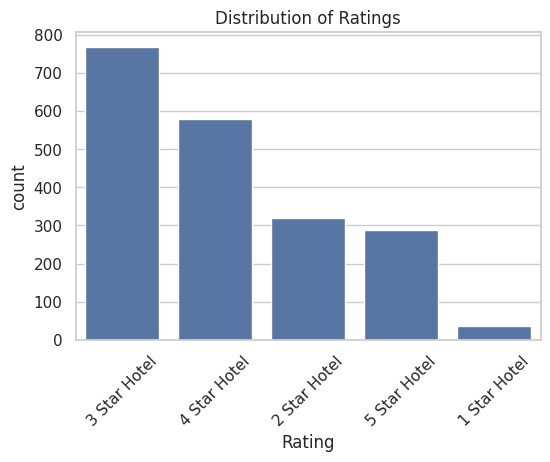

In [ ]:
sns.set(style='whitegrid')

# Categorical Column: Rating
plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()

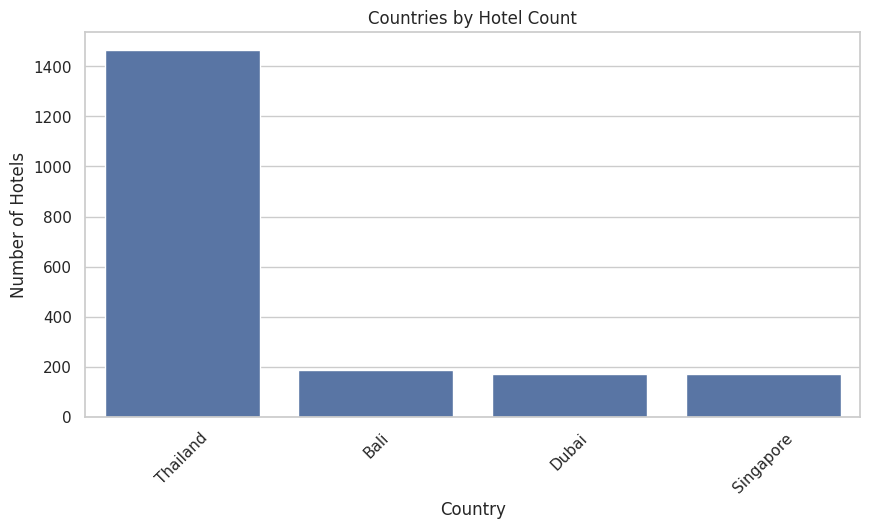

In [ ]:
plt.figure(figsize=(10,5))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Countries by Hotel Count')
plt.xticks(rotation=45)
plt.ylabel('Number of Hotels')
plt.show()

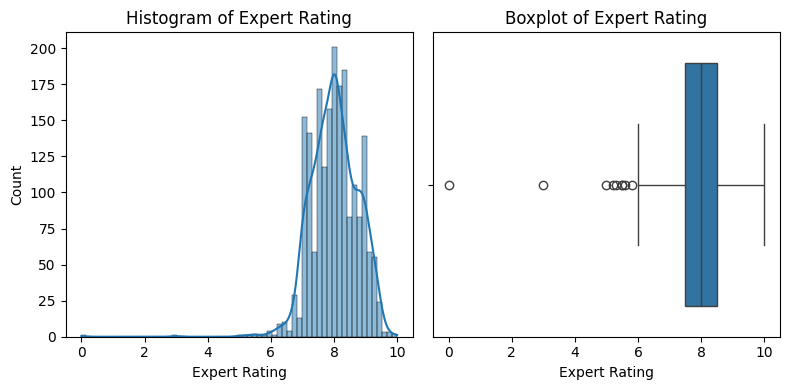

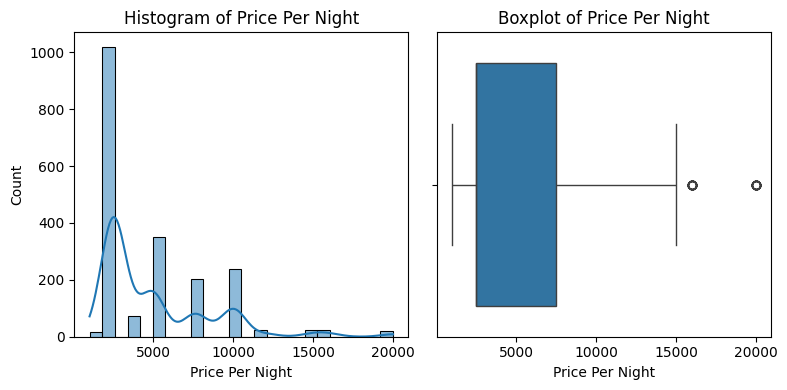

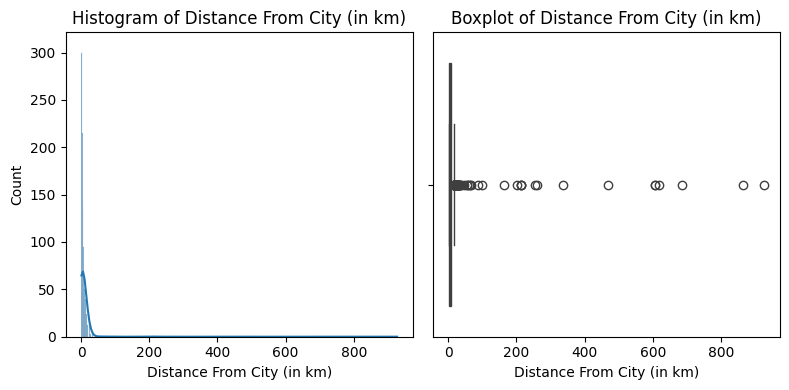

In [10]:
# Numerical Columns
num_cols = ['Expert Rating', 'Price Per Night', 'Distance From City (in km)']
for col in num_cols:
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.savefig("univarent.jpg")
    plt.show()

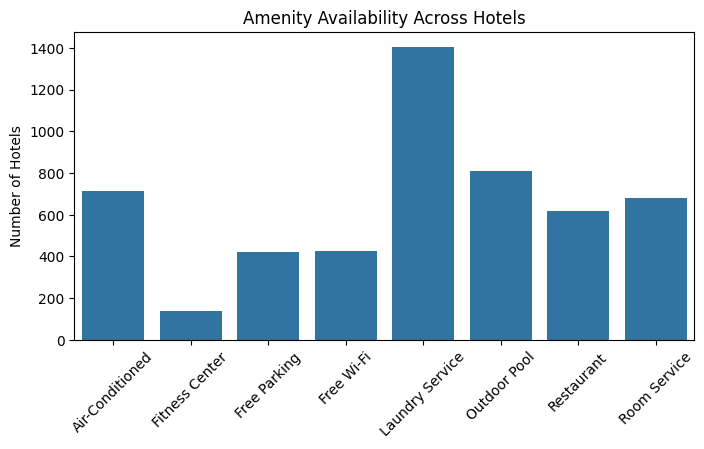

In [11]:
# Binary Columns: Amenities
amenities = ['Air-Conditioned', 'Fitness Center', 'Free Parking', 'Free Wi-Fi',
             'Laundry Service', 'Outdoor Pool', 'Restaurant', 'Room Service']

amenity_counts = {col: df[col].sum() for col in amenities}

plt.figure(figsize=(8,4))
sns.barplot(x=list(amenity_counts.keys()), y=list(amenity_counts.values()))
plt.title('Amenity Availability Across Hotels')
plt.ylabel('Number of Hotels')
plt.xticks(rotation=45)
plt.show()

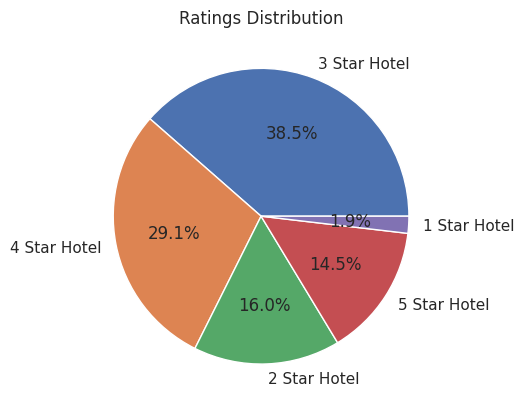

In [ ]:
df['Rating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Ratings Distribution')
plt.ylabel('')
plt.show()

**Bivarient Analysis**<br>
**categorical v/s numerical**

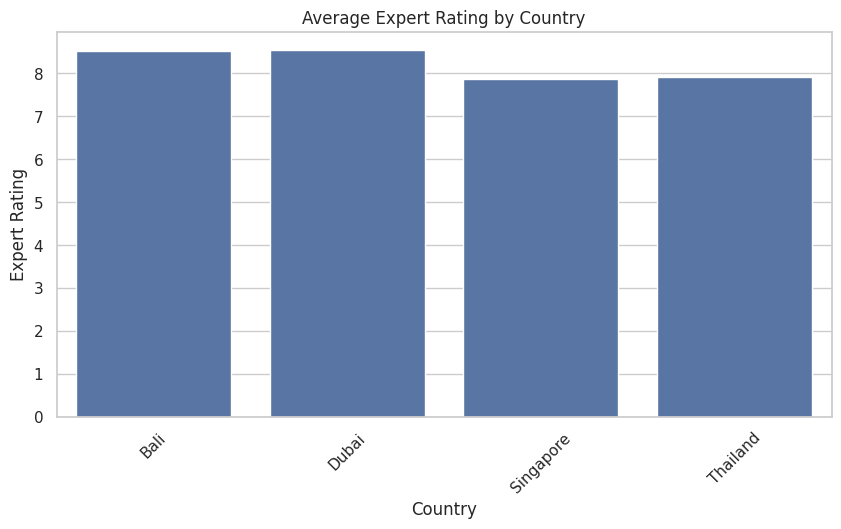

In [ ]:
# Average expert rating by country (Top 10)
top_countries = df['Country'].value_counts().nlargest(10).index
country_avg_rating = df[df['Country'].isin(top_countries)].groupby('Country')['Expert Rating'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=country_avg_rating.index, y=country_avg_rating.values)
plt.title('Average Expert Rating by Country')
plt.ylabel('Expert Rating')
plt.xticks(rotation=45)
plt.show()

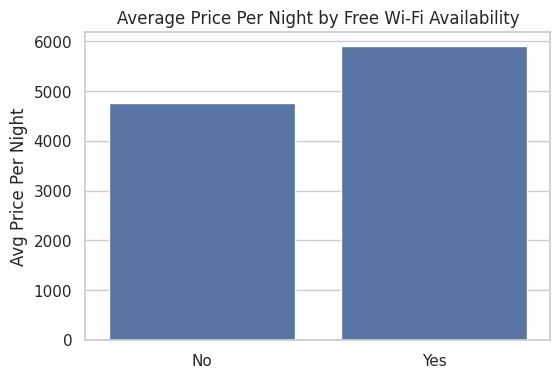

In [ ]:
# Grouped average price by Free Wi-Fi
wifi_price_avg = df.groupby('Free Wi-Fi')['Price Per Night'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=['No', 'Yes'], y=wifi_price_avg.values)
plt.title('Average Price Per Night by Free Wi-Fi Availability')
plt.ylabel('Avg Price Per Night')
plt.show()

**Numerical v/s numerical**

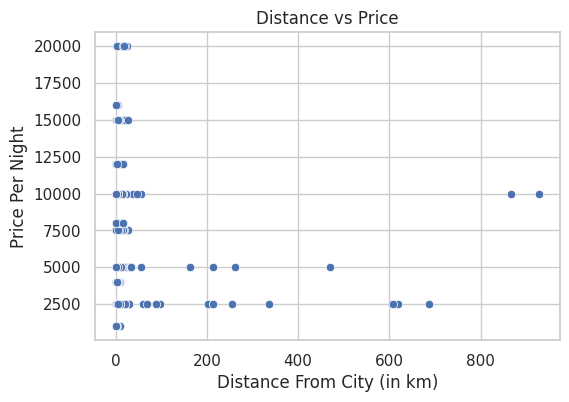

In [ ]:
# Scatter plot: Distance from City vs Price Per Night
plt.figure(figsize=(6,4))
sns.scatterplot(x='Distance From City (in km)', y='Price Per Night', data=df)
plt.title('Distance vs Price')
plt.show()

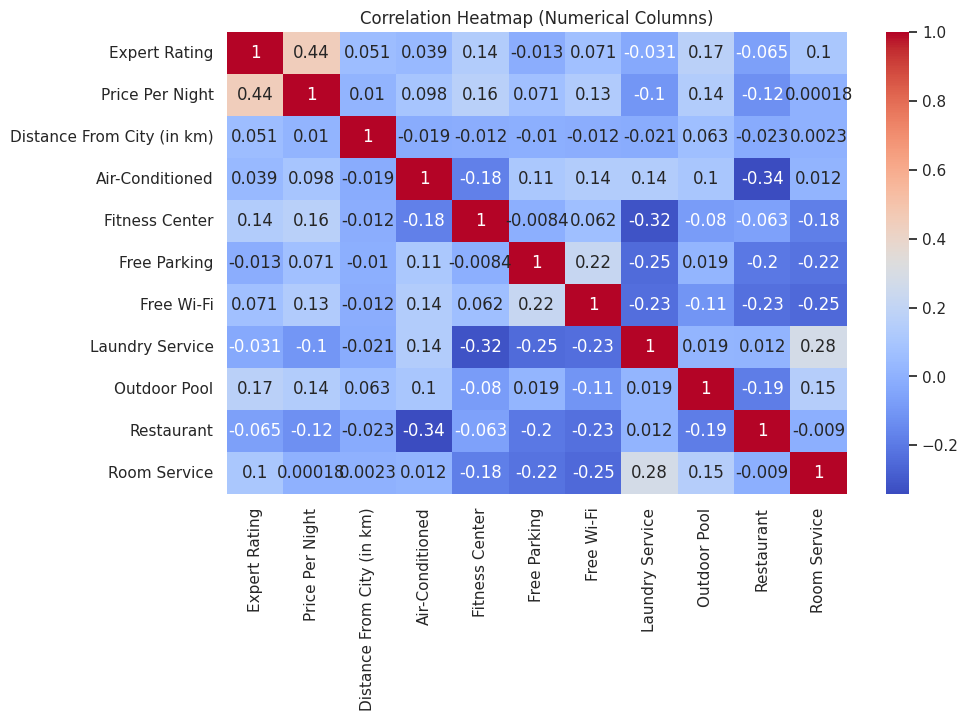

In [ ]:
# Correlation matrix for numerical columns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

✅ Strongest Positive Correlation
Expert Rating ↔ Price Per Night: 0.44

Hotels with higher expert ratings tend to be more expensive.

🔻 Notable Negative Correlations
Restaurant ↔ Air-Conditioned: -0.34

Hotels with restaurants are less likely to have air conditioning.

Laundry Service ↔ Fitness Center: -0.32

Hotels offering laundry may not always have fitness centers (or vice versa).

Room Service ↔ Free Wi-Fi: -0.25

A slight tradeoff — hotels with room service may offer less free Wi-Fi.

🤝 Moderate Positive Relationships
Laundry Service ↔ Room Service: 0.28

Free Parking ↔ Free Wi-Fi: 0.22

These amenities tend to appear together.

**categorical v/s categorical**

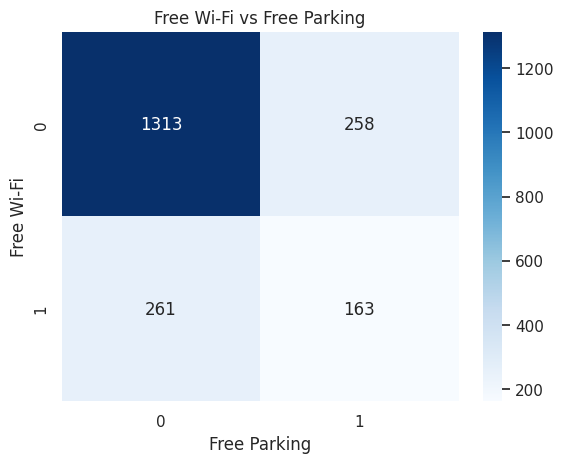

In [ ]:
# Heatmap: Cross-tab of amenities
cross_tab = pd.crosstab(df['Free Wi-Fi'], df['Free Parking'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Free Wi-Fi vs Free Parking')
plt.show()

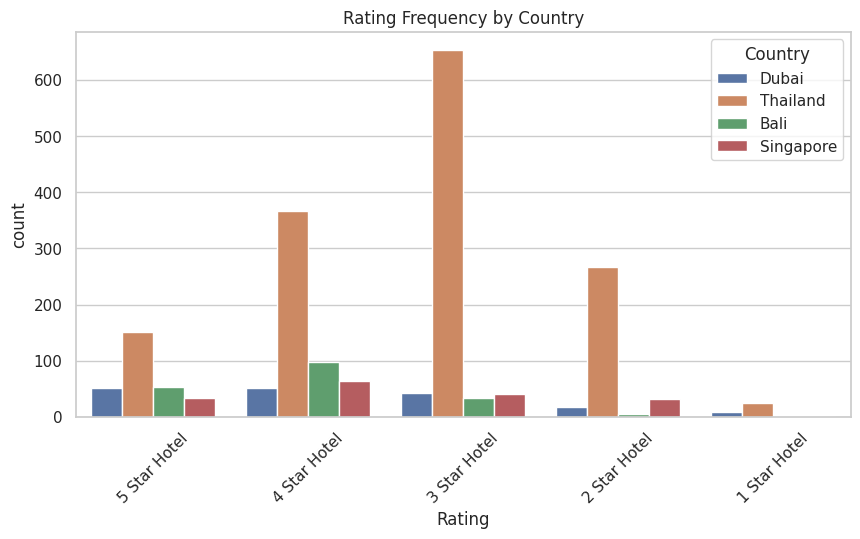

In [ ]:
top_5_countries = df['Country'].value_counts().nlargest(5).index
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Country'].isin(top_5_countries)], x='Rating', hue='Country')
plt.title('Rating Frequency by Country')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()

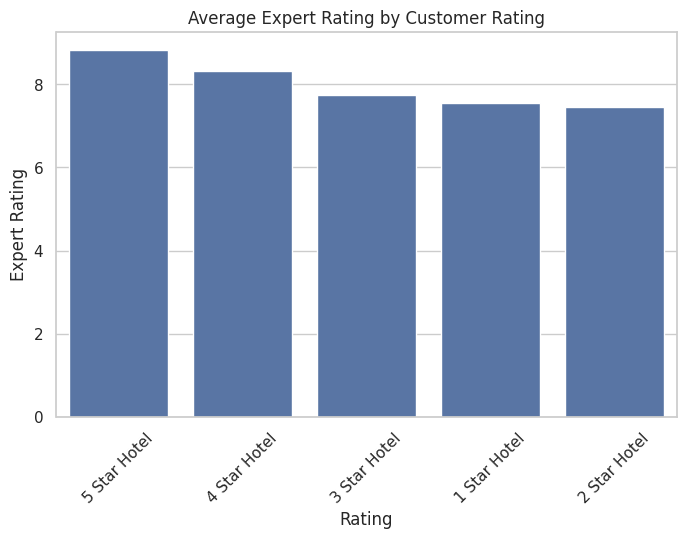

In [ ]:
avg_expert_rating = df.groupby('Rating')['Expert Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_expert_rating.index, y=avg_expert_rating.values)
plt.title('Average Expert Rating by Customer Rating')
plt.ylabel('Expert Rating')
plt.xticks(rotation=45)
plt.show()

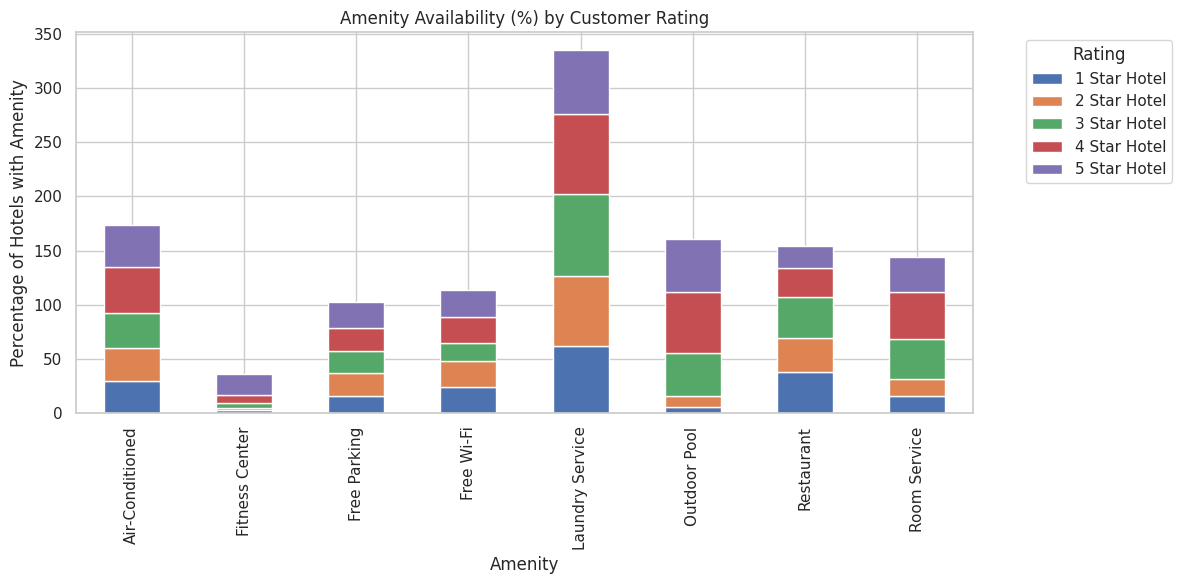

In [ ]:
amenities = ['Air-Conditioned', 'Fitness Center', 'Free Parking', 'Free Wi-Fi',
             'Laundry Service', 'Outdoor Pool', 'Restaurant', 'Room Service']

rating_groups = df.groupby('Rating')[amenities].mean() * 100

rating_groups.T.plot(kind='bar', figsize=(12,6), stacked=True)
plt.title('Amenity Availability (%) by Customer Rating')
plt.ylabel('Percentage of Hotels with Amenity')
plt.xlabel('Amenity')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()